<a href="https://colab.research.google.com/github/10Joseph10/todo-list/blob/main/decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from google.colab import files
import pandas as pd


df = pd.read_csv('drug200.csv')  # Change to your file
print(df.head())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY


In [33]:
le = LabelEncoder()
for col in ['Sex', 'BP', 'Cholesterol','Drug']:
    df[col] = le.fit_transform(df[col])
le_drug = LabelEncoder()
df["Drug"] = le_drug.fit_transform(df["Drug"])
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [21]:
x = df.drop(['Drug'],axis=1)
y = df['Drug']

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.40, random_state=42)

In [12]:
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

In [13]:
model = LogisticRegression(max_iter=1000)
model.fit(xtrain_scaled, ytrain)

LogisticRegression(max_iter=1000)

In [14]:
y_pred = model.predict(xtest_scaled)
print('LOGISTIC REGRESSION ACCURACY: ',accuracy_score(ytest, y_pred)*100)

LOGISTIC REGRESSION ACCURACY:  92.5


In [15]:
conf_matrix = confusion_matrix(ytest, y_pred)
print("\nCONFUSION MATRIX\n")
print(conf_matrix)


CONFUSION MATRIX

[[29  0  2  0  2]
 [ 0 10  0  0  0]
 [ 0  1  5  0  0]
 [ 1  0  0  5  0]
 [ 0  0  0  0 25]]


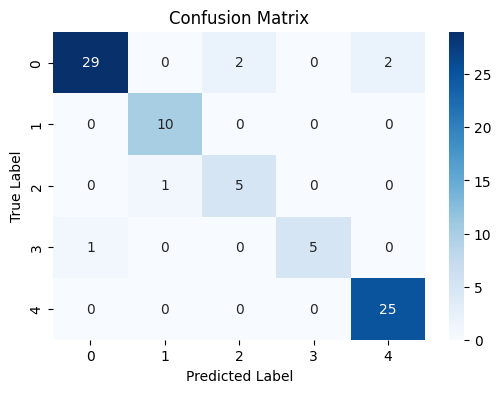

In [32]:
plt.figure(figsize=(6,4))
sn.heatmap(conf_matrix,
           annot=True, fmt='d',
           cmap='Blues',# xticklabels=le.classes_,
          # yticklabels=le.classes_
           )

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [17]:
new_data = pd.DataFrame({
 "Age": [23],
 "Sex": [0],
 "BP": [0],
 "Cholesterol": [0],
 "Na_to_K": [25.355]
})
xt = model.predict(new_data.values)
print("ACTUAL VALUE: ",y[0])
print("PREDICTED VALUE: ",xt)

ACTUAL VALUE:  0
PREDICTED VALUE:  [0]


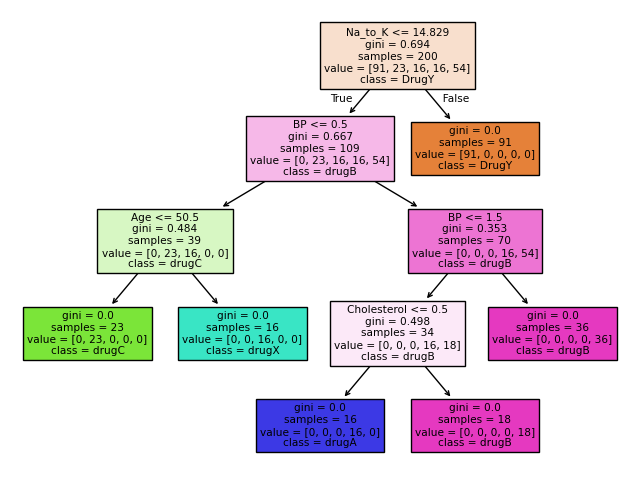

In [45]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from google.colab import files
df = pd.read_csv("drug200.csv")
#df.dropna(axis=0, inplace=True)
y = df['Drug']
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x, y)

plt.figure(figsize=(8, 6))
tree.plot_tree(
    dtree,
    feature_names=list(x.columns),
    class_names=list(y.unique()),

    filled=True
)
plt.show()